# Importing Libraries

In [886]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import Pool,CatBoostClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import roc_auc_score as AUC

In [887]:
train=pd.read_csv("train.csv")
original=pd.read_csv("machine failure.csv")
test=pd.read_csv("test.csv")

In [888]:
original.rename(columns = {'UDI':'id'}, inplace = True)

In [889]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)
original=original.drop('id',axis=1)

# EDA

In [890]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 13.5+ MB


In [891]:
train["Type"].unique()

array(['L', 'M', 'H'], dtype=object)

In [892]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1015.8+ KB


Text(0.5, 1.0, 'Original')

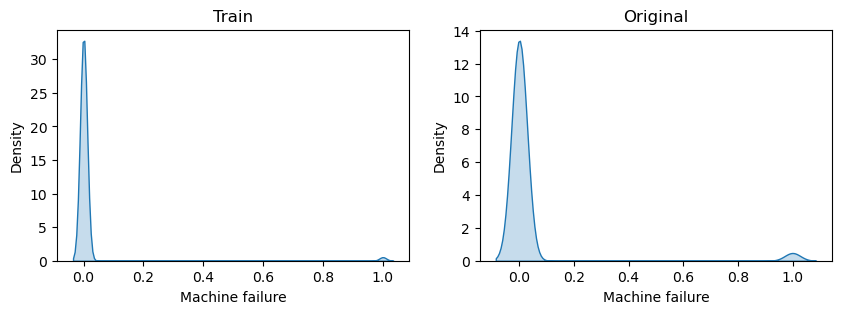

In [893]:
fig,axes=plt.subplots(1,2,figsize=(10,3))
sns.kdeplot(ax=axes[0],x="Machine failure",data=train,fill=True).set_title("Train")
sns.kdeplot(ax=axes[1],x="Machine failure",data=original,fill=True).set_title("Original")

<Axes: >

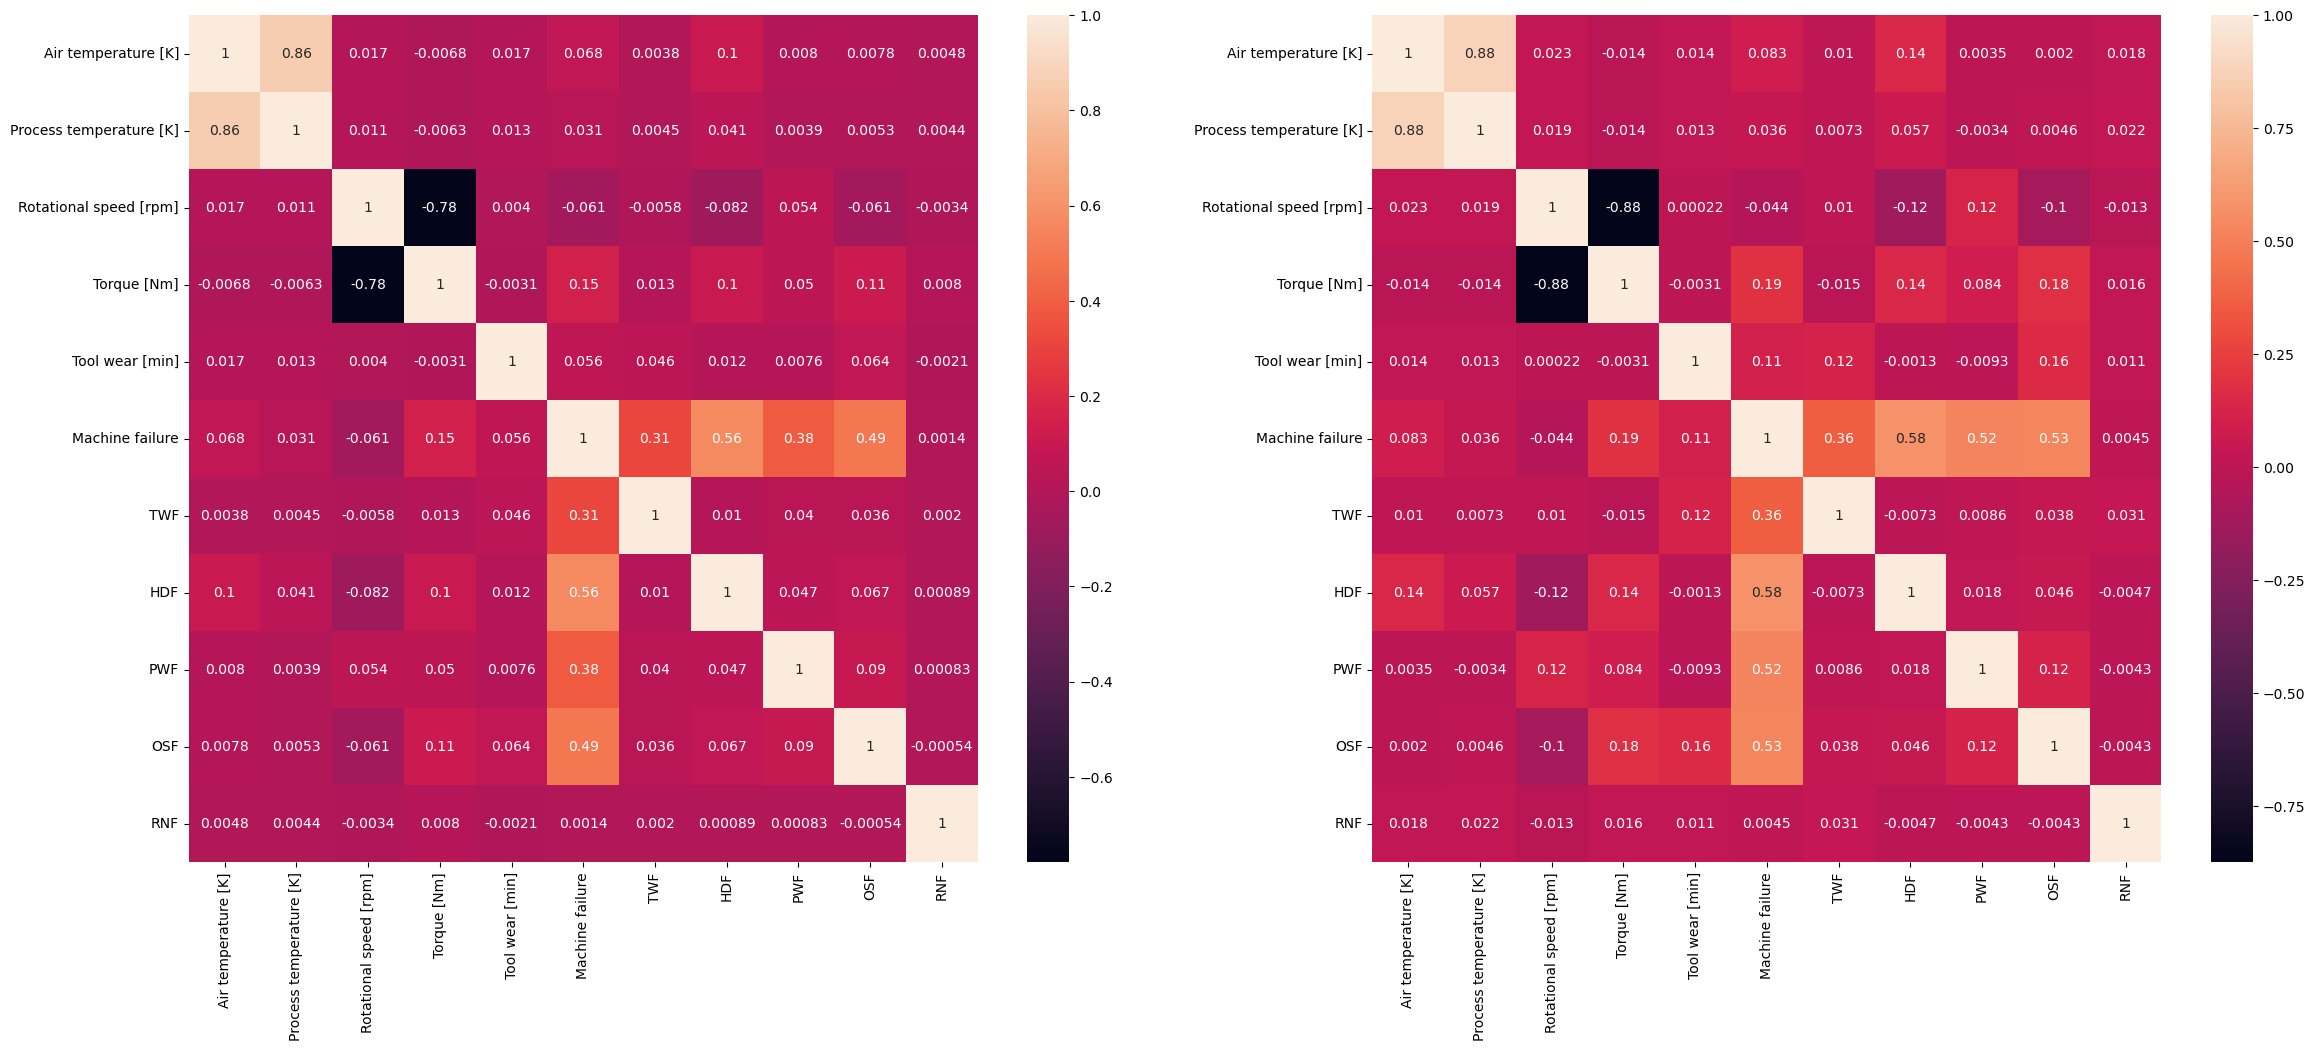

In [894]:
fig,axes=plt.subplots(1,2,figsize=(28,11))
sns.heatmap(ax=axes[0],data=train.corr(numeric_only=True),annot=True)
sns.heatmap(ax=axes[1],data=original.corr(numeric_only=True),annot=True)

# Expanding Dataset

In [895]:
train=pd.concat([train, original], axis = 0).reset_index(drop = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146429 entries, 0 to 146428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               146429 non-null  object 
 1   Type                     146429 non-null  object 
 2   Air temperature [K]      146429 non-null  float64
 3   Process temperature [K]  146429 non-null  float64
 4   Rotational speed [rpm]   146429 non-null  int64  
 5   Torque [Nm]              146429 non-null  float64
 6   Tool wear [min]          146429 non-null  int64  
 7   Machine failure          146429 non-null  int64  
 8   TWF                      146429 non-null  int64  
 9   HDF                      146429 non-null  int64  
 10  PWF                      146429 non-null  int64  
 11  OSF                      146429 non-null  int64  
 12  RNF                      146429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 14.5+ MB


<Axes: >

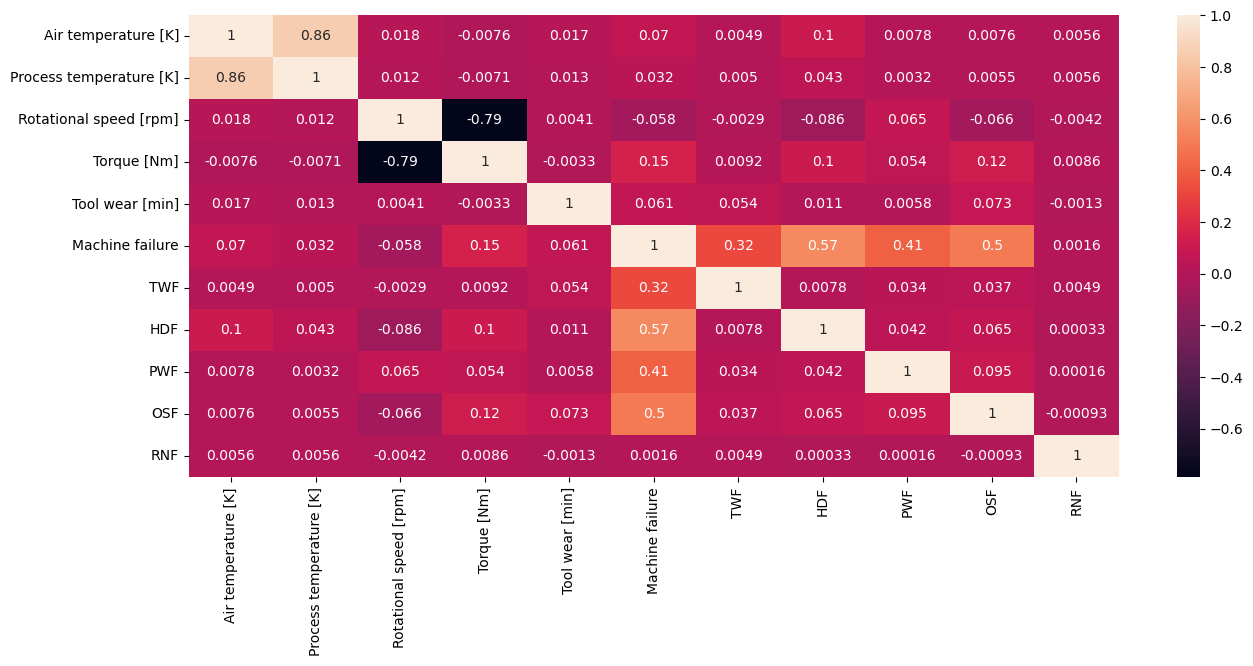

In [896]:
plt.figure(figsize=(15,6))
sns.heatmap(data=train.corr(numeric_only=True),annot=True)

# Data Augumentation

In [897]:
# le = LabelEncoder()
# original['Type'] = le.fit_transform(original['Type'])
# original['Product ID']=le.fit_transform(original['Product ID'])
# train['Type'] = le.fit_transform(train['Type'])
# train['Product ID']=le.fit_transform(train['Product ID'])
# test['Type'] = le.fit_transform(test['Type'])
# test['Product ID']=le.fit_transform(test['Product ID'])
# train

In [898]:
train.dtypes

Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [899]:
train.columns.tolist()

['Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [900]:
train.select_dtypes(include=['float64','int32','int64']).columns.tolist()

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [901]:
train

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146424,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
146425,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
146426,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
146427,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [902]:
# cols=['id', 'Product ID', 'Type', 'Air temperature [K]',
#        'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
#        'Tool wear [min]','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# ss = StandardScaler()
# train[cols]=ss.fit_transform(train[cols])
# test[cols]=ss.fit_transform(test[cols])
# original[cols]=ss.fit_transform(original[cols])
# train

# Model Creation

In [903]:
X=train.drop(columns=["Machine failure"])
Y=train['Machine failure']

In [904]:
X

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
146424,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0
146425,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0
146426,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0
146427,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0


In [905]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
146424    0
146425    0
146426    0
146427    0
146428    0
Name: Machine failure, Length: 146429, dtype: int64

In [906]:
params = {'loss_function': 'Logloss',
          'eval_metric': 'AUC',
          'random_seed': 19970507,
          'learning_rate': 0.027, 
          'iterations': 927, 
          'depth': 5, 
          'subsample': 0.705}
feature_names = ['Product ID','Type','Air temperature [K]','Process temperature [K]',
                 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF','RNF']
train_pool = Pool(X.to_numpy(), Y.to_numpy(), feature_names = feature_names, cat_features = ['Product ID', 'Type'])
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=train_pool, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [907]:
test_pool = Pool(test.to_numpy(), feature_names=feature_names, cat_features = ['Product ID', 'Type'])
pred = model.predict_proba(test_pool)[:,1]

In [908]:
print("Train Score: {}".format(AUC(train["Machine failure"],model.predict(train.drop(columns=["Machine failure"])))))

Train Score: 0.9072381605898238


In [909]:
df=pd.DataFrame()
df["Machine failure"]=pred
df.index = 136428 + df.index
df.index+=1
df.index.name='id'
df

,Machine failure
id,
136429,0.000792
136430,0.000780
136431,0.000519
136432,0.001142
136433,0.000504
...,...
227378,0.000948
227379,0.002038
227380,0.000823


In [910]:
df[df["Machine failure"]==1].sum()

Machine failure    0.0
dtype: float64

In [911]:
df.to_csv('submission.csv', header=True)